In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5  # previous pdf hatch linewidth

In [2]:
#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP2/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

#Abro CanESM5 historico
u850 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc')

v850 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc')

#Abro CanESM5 viento horizonte 1
u850_h1 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_ssp585_r1i1p1f1_2020-2049_2.5.nc')

v850_h1 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_ssp585_r1i1p1f1_2020-2049_2.5.nc')

#Abro CanESM5 viento horizonte 2
u850_h2 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_ssp585_r1i1p1f1_2070-2099_2.5.nc')

v850_h2 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_ssp585_r1i1p1f1_2070-2099_2.5.nc')

lon = np.arange(-180,180, 362/144)
lon_attrs = u850.lon.attrs
u850['lon'] = lon
u850['lon'].attrs = lon_attrs
v850['lon'] = lon
v850['lon'].attrs = lon_attrs

In [3]:
def vientos(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned CRS will be a North Polar
    Stereographic projection, meaning that the vectors will be unevenly
    spaced in a PlateCarree projection.

    """
    crs = ccrs.PlateCarree()
    scale = 1e9
    x = np.linspace(scale, scale, shape[0])
    y = np.linspace(scale, scale, shape[1])

    x2d, y2d = np.meshgrid(x, y)
    u = u850.sel(plev=85000).sel(time=u850['time.season']=='DJF').mean(dim='time').ua.values - u850.sel(plev=85000).sel(time=u850['time.season']=='JJA').mean(dim='time').ua.values
    v = v850.sel(plev=85000).sel(time=v850['time.season']=='DJF').mean(dim='time').va.values - v850.sel(plev=85000).sel(time=v850['time.season']=='JJA').mean(dim='time').va.values
    return x, y, u, v, crs

def vientos_h1(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned CRS will be a North Polar
    Stereographic projection, meaning that the vectors will be unevenly
    spaced in a PlateCarree projection.

    """
    crs = ccrs.PlateCarree()
    scale = 1e9
    x = np.linspace(scale, scale, shape[0])
    y = np.linspace(scale, scale, shape[1])

    x2d, y2d = np.meshgrid(x, y)
    u = u850_h1.sel(plev=85000).sel(time=u850_h1['time.season']=='DJF').mean(dim='time').ua.values - u850_h1.sel(plev=85000).sel(time=u850_h1['time.season']=='JJA').mean(dim='time').ua.values
    v = v850_h1.sel(plev=85000).sel(time=v850_h1['time.season']=='DJF').mean(dim='time').va.values - v850_h1.sel(plev=85000).sel(time=v850_h1['time.season']=='JJA').mean(dim='time').va.values
    return x, y, u, v, crs


def vientos_h2(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned CRS will be a North Polar
    Stereographic projection, meaning that the vectors will be unevenly
    spaced in a PlateCarree projection.

    """
    crs = ccrs.PlateCarree()
    scale = 1e9
    x = np.linspace(scale, scale, shape[0])
    y = np.linspace(scale, scale, shape[1])

    x2d, y2d = np.meshgrid(x, y)
    u = u850_h2.sel(plev=85000).sel(time=u850_h2['time.season']=='DJF').mean(dim='time').ua.values - u850_h2.sel(plev=85000).sel(time=u850_h2['time.season']=='JJA').mean(dim='time').ua.values
    v = v850_h2.sel(plev=85000).sel(time=v850_h2['time.season']=='DJF').mean(dim='time').va.values - v850_h2.sel(plev=85000).sel(time=v850_h2['time.season']=='JJA').mean(dim='time').va.values
    return x, y, u, v, crs


def main():
    plt.figure(figsize=(8, 10))
    lat = u850.lat
    lon = u850.lon
    x, y, u, v, vector_crs = vientos(shape=(len(lon),len(lat)))

    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    plt.title('DJF - JJA')
    ax.coastlines('50m')
    ax.set_extent([-100,60, -70, 20], ccrs.PlateCarree())
    ax.quiver(lon,lat, u, v, transform=ccrs.PlateCarree(), regrid_shape=15)

    plt.show()


In [4]:
#Abro CanESM5 historico
tas = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc')
#Abro CanESM5 viento horizonte 1
tas_h1 = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_ssp585_ensmeani1p1f1_2020-2049_2.5.nc')
#Abro CanESM5 viento horizonte 2
tas_h2 = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_ssp585_ensmeani1p1f1_2070-2099_2.5.nc')

lon = np.arange(-180,180, 362/144)
lon_attrs = u850.lon.attrs
tas['lon'] = lon
tas['lon'].attrs = lon_attrs
tas_h1['lon'] = lon
tas_h1['lon'].attrs = lon_attrs
tas_h2['lon'] = lon
tas_h2['lon'].attrs = lon_attrs
lat = tas.lat
lon = tas.lon

huss = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc')

huss_h1 = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_ssp585_r1i1p1f1_2020-2049_2.5.nc')

huss_h2 = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_ssp585_r1i1p1f1_2070-2099_2.5.nc')
huss['lon'] = lon
huss['lon'].attrs = lon_attrs
huss_h1['lon'] = lon
huss_h1['lon'].attrs = lon_attrs
huss_h2['lon'] = lon
huss_h2['lon'].attrs = lon_attrs

In [5]:


tas_x = tas.tas.differentiate(coord='lon')
tas_y = tas.tas.differentiate(coord='lat')

tas_x_h1 = tas_h1.tas.differentiate(coord='lon')
tas_y_h1 = tas_h1.tas.differentiate(coord='lat')

tas_x_h2 = tas_h2.tas.differentiate(coord='lon')
tas_y_h2 = tas_h2.tas.differentiate(coord='lat')



In [6]:
huss_x = huss.huss.differentiate(coord='lon')
huss_y = huss.huss.differentiate(coord='lat')

huss_x_h1 = huss.huss.differentiate(coord='lon')
huss_y_h1 = huss.huss.differentiate(coord='lat')

huss_x_h2 = huss.huss.differentiate(coord='lon')
huss_y_h2 = huss.huss.differentiate(coord='lat')

In [7]:
x, y, u, v, vector_crs = vientos(shape=(len(lon),len(lat)))

x, y, u_h1, v_h1, vector_crs = vientos_h1(shape=(len(lon),len(lat)))

x, y, u_h2, v_h2, vector_crs = vientos_h2(shape=(len(lon),len(lat)))

In [8]:
adv_T = (u*tas_x.sel(time=tas_x['time.season']=='DJF').mean(dim='time') + v*tas_y.sel(time=tas_y['time.season']=='DJF').mean(dim='time'))/(2.5*111000)
adv_q = (u*huss_x.sel(time=huss_x['time.season']=='DJF').mean(dim='time') + v*huss_y.sel(time=huss_y['time.season']=='DJF').mean(dim='time'))/(2.5*111000)
adv = (adv_T + adv_q)

adv_T_h1 = (u_h1*tas_x_h1.sel(time=tas_x_h1['time.season']=='DJF').mean(dim='time') + v_h1*tas_y_h1.sel(time=tas_y_h1['time.season']=='DJF').mean(dim='time'))/(2.5*111000)
adv_q_h1 = (u_h1*huss_x_h1.sel(time=huss_x_h1['time.season']=='DJF').mean(dim='time') + v_h1*huss_y_h1.sel(time=huss_y_h1['time.season']=='DJF').mean(dim='time'))/(2.5*111000)
adv_h1 = (adv_T_h1 + adv_q_h1)

adv_T_h2 = (u_h2*tas_x_h2.sel(time=tas_x_h2['time.season']=='DJF').mean(dim='time') + v_h2*tas_y_h2.sel(time=tas_y_h2['time.season']=='DJF').mean(dim='time'))/(2.5*111000)
adv_q_h2 = (u_h2*huss_x_h2.sel(time=huss_x_h2['time.season']=='DJF').mean(dim='time') + v_h2*huss_y_h2.sel(time=huss_y_h2['time.season']=='DJF').mean(dim='time'))/(2.5*111000)
adv_h2 = (adv_T_h2 + adv_q_h2)


In [23]:
def map_adv(dato,clevels,var,titulo):
    
    fig = plt.figure(figsize=(8, 10))
    lat = tas.lat
    lon = tas.lon
    x, y, u, v, vector_crs = vientos(shape=(len(lon),len(lat)))

    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    plt.title(str(titulo))
    ax.coastlines('50m')
    ax.set_extent([-100,60, -70, 10], ccrs.PlateCarree())
    
    clevels = clevels
    im1=ax.contourf(lon, lat, dato,clevels,transform=vector_crs,cmap='RdBu_r',extend='both') 
    
    ax.gridlines(crs=vector_crs, linewidth=0.3, linestyle='-')
    ax.quiver(lon,lat, u_h1 - u_h2, v_h1 - v_h2, transform=ccrs.PlateCarree(), regrid_shape=15)
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .8, bottom1, 0.02, 1*height])
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    #ticklabs = cbar.ax.get_yticklabels()
    #cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('$\Delta $ v dot grad('+str(var)+') ',fontsize=20)

    plt.show()

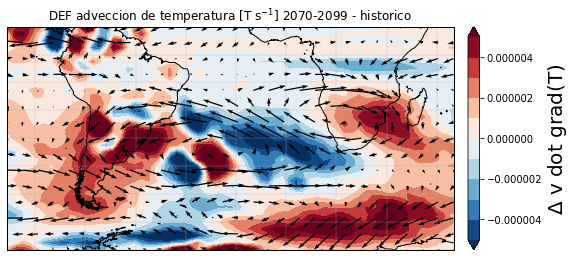

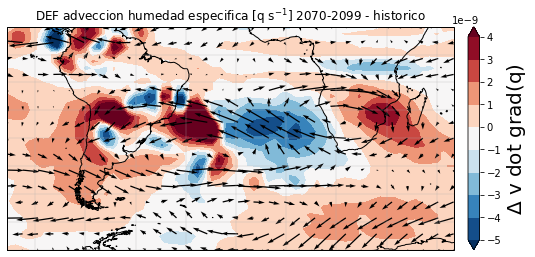

In [15]:
titulo = 'DEF adveccion de temperatura [T s$^{-1}$] 2070-2099 - historico'
clevels = np.arange(-0.000005,0.000005,.000001)
var = 'T'
map_adv(adv_T_h2-adv_T,clevels,var,titulo)

titulo = 'DEF adveccion humedad especifica [q s$^{-1}$] 2070-2099 - historico'
clevels = np.arange(-0.000000005,0.000000005,.000000001)
var = 'q'
map_adv(adv_q_h2-adv_q,clevels,var,titulo)

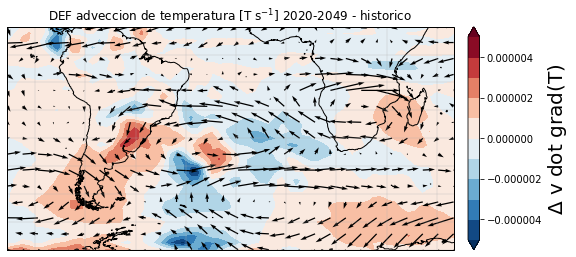

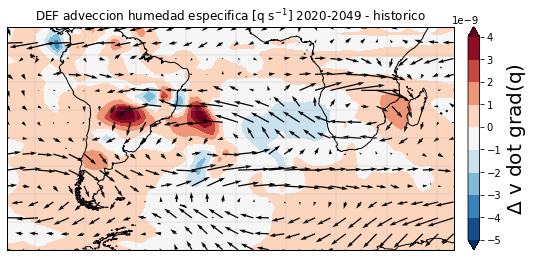

In [22]:
titulo = 'DEF adveccion de temperatura [T s$^{-1}$] 2020-2049 - historico'
clevels = np.arange(-0.000005,0.000005,.000001)
var = 'T'
map_adv(adv_T_h1-adv_T,clevels,var,titulo)

titulo = 'DEF adveccion humedad especifica [q s$^{-1}$] 2020-2049 - historico'
clevels = np.arange(-0.000000005,0.000000005,.000000001)
var = 'q'
map_adv(adv_q_h1-adv_q,clevels,var,titulo)

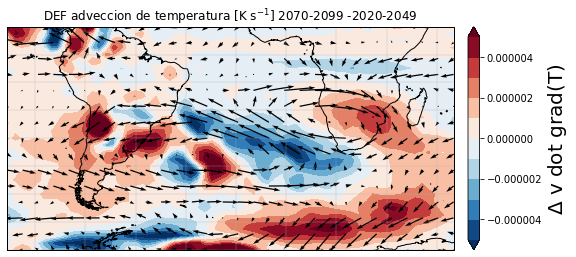

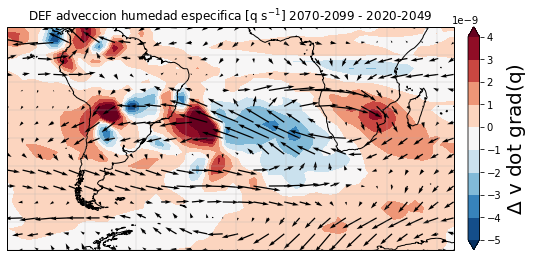

In [24]:
titulo = 'DEF adveccion de temperatura [K s$^{-1}$] 2070-2099 -2020-2049'
clevels = np.arange(-0.000005,0.000005,.000001)
var = 'T'
map_adv(adv_T_h2-adv_T_h1,clevels,var,titulo)

titulo = 'DEF adveccion humedad especifica [q s$^{-1}$] 2070-2099 - 2020-2049'
clevels = np.arange(-0.000000005,0.000000005,.000000001)
var = 'q'
map_adv(adv_q_h2-adv_q_h1,clevels,var,titulo)

## Evaporacion

In [102]:
#Abro CanESM5 historico
evspsbl = xr.open_dataset(path2+'CanESM5/evspsbl_Amon_CanESM5_historical_ensmeani1p1f1_2.5_mes.nc').evspsbl
#Abro CanESM5 viento horizonte 1
evspsbl_h1 = xr.open_dataset(path2+'CanESM5/evspsbl_Amon_CanESM5_ssp585_ensmeani1p1f1_2020-2049_2.5_mes.nc').evspsbl
#Abro CanESM5 viento horizonte 2
evspsbl_h2 = xr.open_dataset(path2+'CanESM5/evspsbl_Amon_CanESM5_ssp585_ensmeani1p1f1_2070-2099_2.5_mes.nc').evspsbl

lon = np.arange(-180,180, 362/144)
lon_attrs = u850.lon.attrs
evspsbl['lon'] = lon
evspsbl['lon'].attrs = lon_attrs
evspsbl_h1['lon'] = lon
evspsbl_h1['lon'].attrs = lon_attrs
evspsbl_h2['lon'] = lon
evspsbl_h2['lon'].attrs = lon_attrs
lat = tas.lat
lon = tas.lon

In [116]:
def map_evs(dato,clevels,var,titulo):
    
    fig = plt.figure(figsize=(8, 10))
    lat = tas.lat
    lon = tas.lon
    x, y, u, v, vector_crs = vientos(shape=(len(lon),len(lat)))

    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    plt.title(str(titulo))
    ax.coastlines('50m')
    ax.set_extent([-100,60, -70, 10], ccrs.PlateCarree())
    
    clevels = clevels
    im1=ax.contourf(lon, lat, dato,clevels,transform=vector_crs,cmap='PuOr',extend='both') 
    
    ax.gridlines(crs=vector_crs, linewidth=0.3, linestyle='-')
    #ax.quiver(lon,lat, u, v, transform=ccrs.PlateCarree(), regrid_shape=15)
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .8, bottom1, 0.02, 1*height])
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    #ticklabs = cbar.ax.get_yticklabels()
    #cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('$\Delta $ mm ',fontsize=20)

    plt.show()

In [103]:
evspsbl = evspsbl.sel(time=evspsbl['time.season']=='DJF').mean(dim='time')
evspsbl_h1 = evspsbl_h1.sel(time=evspsbl_h1['time.season']=='DJF').mean(dim='time')
evspsbl_h2 = evspsbl_h2.sel(time=evspsbl_h2['time.season']=='DJF').mean(dim='time')

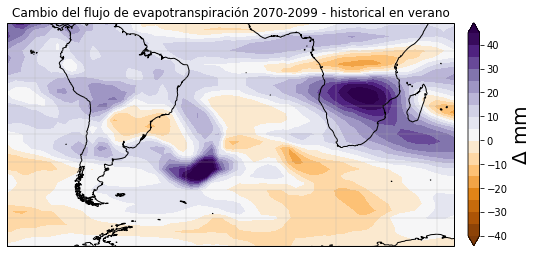

In [117]:
titulo = 'Cambio del flujo de evapotranspiración 2070-2099 - historical en verano'
clevels = np.arange(-40,50,5)
var = 'evs'
figura = map_evs(evspsbl_h2-evspsbl,clevels,var,titulo)

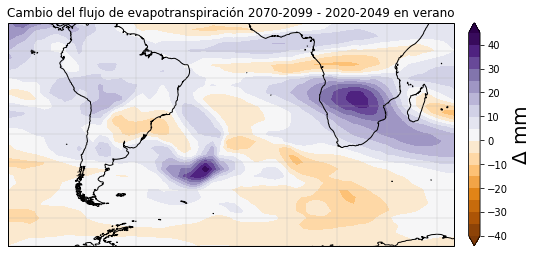

In [118]:
titulo = 'Cambio del flujo de evapotranspiración 2070-2099 - 2020-2049 en verano'
clevels = np.arange(-40,50,5)
var = 'evs'
figura = map_evs(evspsbl_h2-evspsbl_h1,clevels,var,titulo)

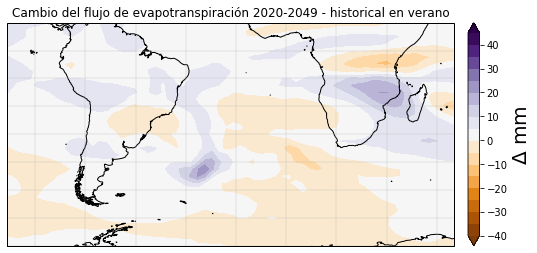

In [119]:
titulo = 'Cambio del flujo de evapotranspiración 2020-2049 - historical en verano'
clevels = np.arange(-40,50,5)
var = 'evs'
figura = map_evs(evspsbl_h1-evspsbl,clevels,var,titulo)

In [19]:

 
 
 def map_adv(dato,clevels,var,titulo):
    
    fig = plt.figure(figsize=(8, 10))
    lat = tas.lat
    lon = tas.lon
    x, y, u, v, vector_crs = vientos(shape=(len(lon),len(lat)))

    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    plt.title(str(titulo))
    ax.coastlines('50m')
    ax.set_extent([100,180, -50, 0], ccrs.PlateCarree())
    
    clevels = clevels
    im1=ax.contourf(lon, lat, dato,clevels,transform=vector_crs,cmap='RdBu_r',extend='both') 
    
    ax.gridlines(crs=vector_crs, linewidth=0.3, linestyle='-')
    ax.quiver(lon,lat, u-u_h2, v-v_h2, transform=ccrs.PlateCarree(), regrid_shape=15)
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .8, bottom1, 0.02, 1*height])
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    #ticklabs = cbar.ax.get_yticklabels()
    #cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('$\Delta $ v dot grad('+str(var)+') ',fontsize=20)

    plt.show()

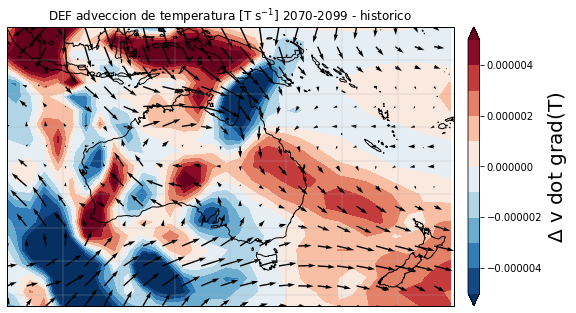

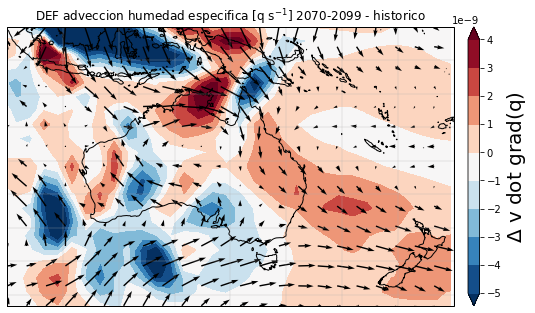

In [20]:
titulo = 'DEF adveccion de temperatura [T s$^{-1}$] 2070-2099 - historico'
clevels = np.arange(-0.000005,0.000005,.000001)
var = 'T'
map_adv(adv_T_h2-adv_T,clevels,var,titulo)

titulo = 'DEF adveccion humedad especifica [q s$^{-1}$] 2070-2099 - historico'
clevels = np.arange(-0.000000005,0.000000005,.000000001)
var = 'q'
map_adv(adv_q_h2-adv_q,clevels,var,titulo)

In [209]:
def map_evs2(dato,clevels,var,titulo):
    
    fig = plt.figure(figsize=(8, 10))
    lat = tas.lat
    lon = tas.lon
    x, y, u, v, vector_crs = vientos(shape=(len(lon),len(lat)))

    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    plt.title(str(titulo))
    ax.coastlines('50m')
    ax.set_extent([100,180, -50, 0], ccrs.PlateCarree())
    
    clevels = clevels
    im1=ax.contourf(lon, lat, dato,clevels,transform=vector_crs,cmap='PuOr',extend='both') 
    
    ax.gridlines(crs=vector_crs, linewidth=0.3, linestyle='-')
    #ax.quiver(lon,lat, u, v, transform=ccrs.PlateCarree(), regrid_shape=15)
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .8, bottom1, 0.02, 1*height])
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    #ticklabs = cbar.ax.get_yticklabels()
    #cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('$\Delta $ mm ',fontsize=20)

    plt.show()

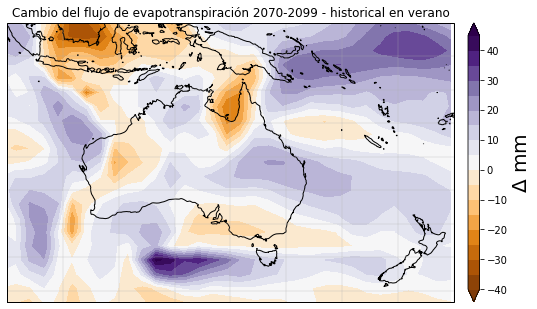

In [211]:
titulo = 'Cambio del flujo de evapotranspiración 2070-2099 - historical en verano'
clevels = np.arange(-40,50,5)
var = 'evs'
figura = map_evs2(evspsbl_h2-evspsbl,clevels,var,titulo)